### Sommaire

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Machine Learning Model: K-Nearest Neighbors (KNN)](#0)<br>
    [Choix alétoire de K](#2) <br>
    [Calibrage des hyperparamètres - Choix du K-Optimal](#3) <br>
    [Cross-Validation CV](#4) <br>
    [GridSearchCV](#5) <br>
    [Frontière de décision (Decision regions boundary)](#6) <br>
    
2. [Machine Learning Model: Logistic Regression (Logit)](#7) <br>
   [Ridge Regression et Lasso](#8) <br>
   [Feature Selection](#9) <br>
</div>
<hr>
<img src="https://img.freepik.com/free-vector/polygonal-wireframe-business-strategy-composition-with-glittering-images-human-hand-with-chess-pieces-with-text_1284-32266.jpg?t=st=1669261684~exp=1669262284~hmac=93e592991e95cfb9651f3234ed66fa96e8f8284049947e08d6c3377683516189" width=300>

In [4]:
df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().mean()
df.info()
df.describe(percentiles=None, include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Machine Learning Model : K-Nearest Neighbors (KNN)  <a id="0"></a>

In [567]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

# Variable indépendante et dépendante du modèle KNN:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dimension de la matrice 
print('La dimension de la variable X est:', str(X.shape))
print('La dimension de la variable y est:', str(y.shape))

# Partitionnement (découpage) en échantillon d'entrainement et test (sans validation-croisée)
from sklearn.model_selection import train_test_split

#Split en 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=42, shuffle=True)

# Training set = 614 obs and Test set = 154 obs
print('La dimension de la variable X_train est:', str(X_train.shape))
print('La dimension de la variable X_test est:', str(X_test.shape))
print('La dimension de la variable y_train est:', str(y_train.shape))
print('La dimension de la variable y_test est:', str(y_test.shape))

La dimension de la variable X est: (768, 8)
La dimension de la variable y est: (768,)
La dimension de la variable X_train est: (614, 8)
La dimension de la variable X_test est: (154, 8)
La dimension de la variable y_train est: (614,)
La dimension de la variable y_test est: (154,)


#### Choix aléatoire de K <a id="2"></a>

In [570]:
#K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn      = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',metric='minkowski')
knn_fit  = knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
print('Association de la classe 0 ou 1 pour les n = 5 premiers patients:', str(knn_pred[0:10]))
# Le 4e, 6e, 9e et 10e patient est classé par le modèle comme étant : Diabétique 

train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print('Précision de la classification du modèle KNN (Training set):', str(knn.score(X_train,y_train)))
print('Précision de la classification du modèle KNN (Test set):', str(knn.score(X_test,y_test)))

Association de la classe 0 ou 1 pour les n = 5 premiers patients: [0 0 0 1 0 1 0 0 1 1]
Précision de la classification du modèle KNN (Training set): 0.7980456026058632
Précision de la classification du modèle KNN (Test set): 0.6623376623376623


#### Calibrage des hyperparamètres - Choix du K-Optimal <a id="3"></a>

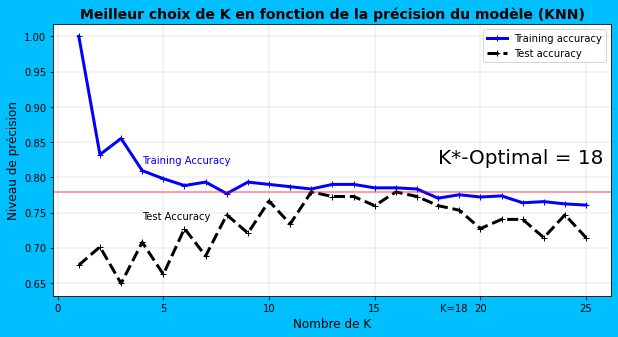

In [571]:
K_numbers = np.arange(1,26)

train_acc = []
test_acc  = [] 

for  k in K_numbers:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn.predict(X_test)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))
    

plt.figure(figsize=(10,5),edgecolor='black', facecolor='deepskyblue')
plt.plot(K_numbers, train_acc, color = 'Blue', lw=3, marker='+', label='Training accuracy')
plt.plot(K_numbers, test_acc, color = 'Black', lw=3, marker='+', linestyle='--' ,label='Test accuracy')
plt.title('Meilleur choix de K en fonction de la précision du modèle (KNN)', fontsize=14, fontweight='bold')
plt.xlabel('Nombre de K', fontsize=12)
plt.ylabel('Niveau de précision', fontsize=12)
plt.legend(loc = 0)
plt.grid(True, lw=0.3)

#annote
plt.text(4, 0.82, 'Training Accuracy', fontsize = 10, color ='Blue')
plt.text(4, 0.74, 'Test Accuracy', fontsize = 10, color ='Black')
plt.text(18, 0.82, 'K*-Optimal = 18', fontsize = 20, color ='Black')

plt.axhline(y=max(test_acc), color='red', alpha=0.5)
plt.text(18.1, 0.61, 'K=18', fontsize = 10, color ='Black')

plt.show()

#### Cross-Validation CV  <a id="4"></a>

In [572]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

knn_CV = KNeighborsClassifier(n_neighbors=5)
KF = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_CV, X, y, cv=KF, scoring='accuracy')

print('La moyenne de la précision sans validation-croisée pour K = 5:', "{:.0%}".format(test_accuracy))
print('La moyenne de la précision sur les 5-Fold pour K = 5 est:', "{:.0%}".format(np.mean(cv_scores)))
print('On a augmenté la précision du modèle de:',"{:.0%}".format((0.69-0.66)))


La moyenne de la précision sans validation-croisée pour K = 5: 66%
La moyenne de la précision sur les 5-Fold pour K = 5 est: 69%
On a augmenté la précision du modèle de: 3%


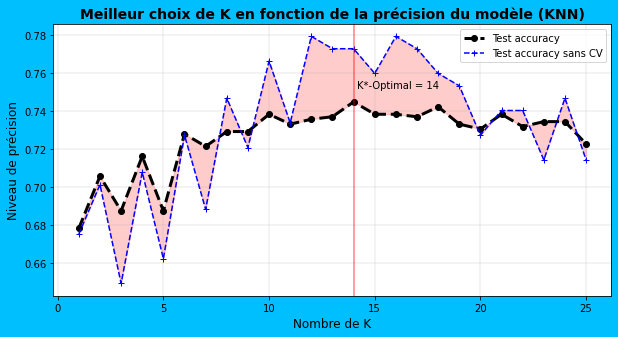

In [573]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

K_numbers = np.arange(1,26)

test_acc_CV = []

for i in K_numbers:
    KF_CV = KFold(n_splits=5, random_state=42, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_cv_scores = cross_val_score(knn, X, y, cv=KF_CV, scoring='accuracy')
    test_acc_CV.append(np.mean(knn_cv_scores))


plt.figure(figsize=(10,5),edgecolor='black', facecolor='deepskyblue')
plt.plot(K_numbers, test_acc_CV, color = 'Black', lw=3, marker='o', linestyle='--' ,label='Test accuracy')
plt.plot(K_numbers, test_acc, color = 'Blue', lw=1.5, marker='+', linestyle='--' ,label='Test accuracy sans CV')
plt.fill_between(K_numbers, test_acc_CV, test_acc, color='red', alpha=0.2)
plt.title('Meilleur choix de K en fonction de la précision du modèle (KNN)', fontsize=14, fontweight='bold')
plt.xlabel('Nombre de K', fontsize=12)
plt.ylabel('Niveau de précision', fontsize=12)
plt.legend(loc = 0)
plt.grid(True, lw=0.3) 

plt.text(14.15, 0.752, 'K*-Optimal = 14', fontsize = 10, color ='Black')

plt.axvline(x=14, color='red', alpha=0.5)

plt.show()


#### GridSearchCV <a id="5"></a>

In [574]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 26)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)
#check top performing n_neighbors value
knn_gscv.best_params_
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7578558696205755

In [575]:
print('Le meilleur K a choisir par CV est :', knn_gscv.best_params_)

Le meilleur K a choisir par CV est : {'n_neighbors': 14}


#### Frontière de décision (Decision regions boundary) <a id="6"></a>

0.7817589576547231

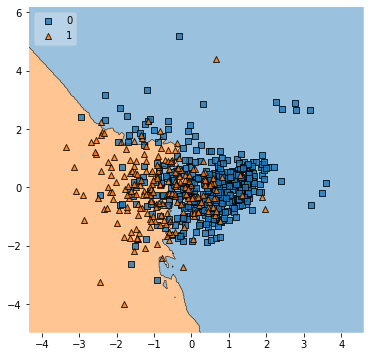

In [576]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
plt.figure(figsize=(6,6))
# Plotting the decision boundary
y1 = df['Outcome'].values
X1 = df[['Age', 'BMI', 'Glucose']].values
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X1, y1, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_n)
X_test_sc = sc.transform(X_test_n)

clf_knn = KNeighborsClassifier(n_neighbors=14)

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_sc)

clf_knn.fit(X_train_pca, y_train_n)
plot_decision_regions(X_train_pca, y_train_n, clf=clf_knn, legend=2)
clf_knn.score(X_train_pca, y_train_n)

#### Machine Learning Model : Logistic Regression (Logit) <a id="7"></a>

In [517]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score

X = df.drop('Outcome', axis=1)
y = df[['Outcome']]

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print("La dimension de X_train_log est:", str(X_train_log.shape))
print("La dimension de X_test_log est:", str(X_test_log.shape))
print("La dimension de y_train_log est:", str(y_train_log.shape))
print("La dimension de y_test_log est:", str(y_test_log.shape))


logreg = LogisticRegression(max_iter=1000)
logreg_fit = logreg.fit(X_train_log, y_train_log)
logreg_pred = logreg.predict(X_test_log)
logreg.score(X_test,y_test)
cf_matrix = confusion_matrix(y_test_log, logreg_pred) 

La dimension de X_train_log est: (614, 8)
La dimension de X_test_log est: (154, 8)
La dimension de y_train_log est: (614, 1)
La dimension de y_test_log est: (154, 1)


/Users/alexandreohayon/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [577]:
print(classification_report(y_test_log, logreg_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



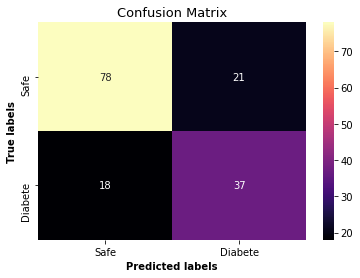

In [588]:
import seaborn as sns
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, cmap='magma', fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontweight='bold');ax.set_ylabel('True labels',fontweight='bold'); 
ax.set_title('Confusion Matrix', fontsize = 13); 
ax.xaxis.set_ticklabels(['Safe', 'Diabete']); ax.yaxis.set_ticklabels(['Safe', 'Diabete']);

In [589]:
print('Recall_score:', "{:.0%}".format(recall_score(y_test_log,logreg_pred)))
print('Accuracy_score:', "{:.0%}".format(accuracy_score(y_test_log, logreg_pred)))

Recall_score: 67%
Accuracy_score: 75%


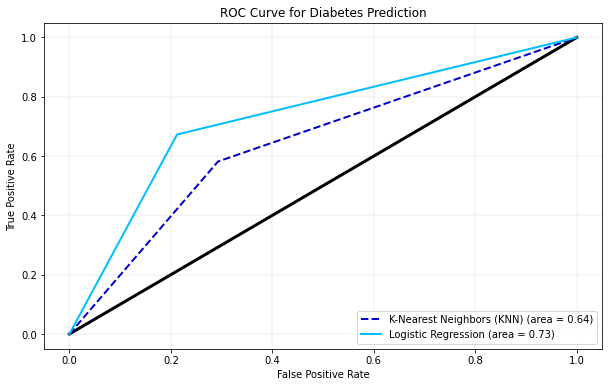

In [600]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

plt.figure(figsize=(10,6))

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_pred)#
fpr, tpr, thresholds = roc_curve(y_test_log, logreg_pred)#fpr = false positive rate and tpr = true positive rate
plt.plot([0, 1], [0, 1], 'k-', lw=3)

# Plot tpr against fpr
roc_auc_knn = roc_auc_score(y_test, knn_pred)
roc_auc_log = roc_auc_score(y_test_log, logreg_pred)
# K-Nearest Neighbors:
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors (KNN) (area = %0.2f)' %roc_auc_knn, color='mediumblue', lw=2, linestyle='--')

#LOGISTIC REGRESSION:
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %roc_auc_log, color='deepskyblue', lw=2)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.grid(True, lw=0.2)
plt.title('ROC Curve for Diabetes Prediction')
plt.show()


0.7198697068403909

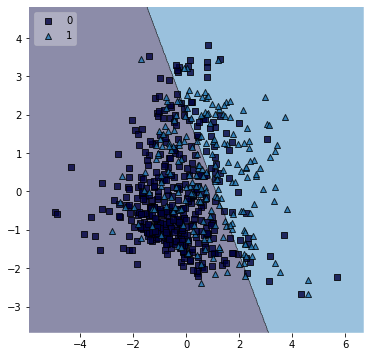

In [363]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(6,6))
# Plotting the decision boundary

y1 = df['Outcome'].values
X1 = df.drop('Outcome', axis=1).values
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X1, y1, test_size=0.2, random_state=42)


sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_n)
X_test_sc = sc.transform(X_test_n)


clf_logreg = LogisticRegression()

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_sc)

clf_logreg.fit(X_train_pca, y_train_n)
plot_decision_regions(X_train_pca, y_train_n, clf=clf_logreg, legend=2, colors='#000040,#1f77b4')
clf_logreg.score(X_train_pca, y_train_n)

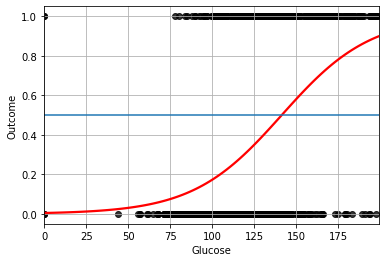

In [562]:
sns.regplot(x=df.Glucose, y=df.Outcome, data=df, logistic=True, ci=False, color='black', 
            line_kws={'color' : 'red'})
plt.grid(True)
plt.axhline(y=0.5)

#### Ridge Regression and LASSO <a id="8"></a>

In [423]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [446]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RR = Ridge(alpha=0.2)
RR.fit(X_train, y_train)
RR.predict(X_test)
score = RR.score(X_test, y_test)
print(score)


0.2549500834733004


### Feature Selection <a id="9"></a>

[ 0.00000000e+00  6.07984764e-03 -4.26871361e-04  0.00000000e+00
 -8.17882506e-05  7.78847221e-03  0.00000000e+00  3.08440209e-03]


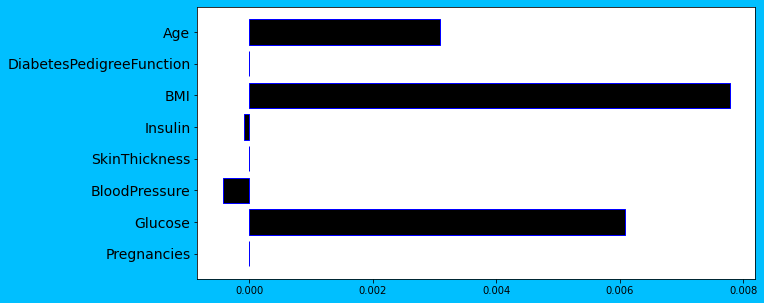

In [507]:
# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)
# Fit the model to the data
lasso.fit(X,y)
# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
data = {'Pregnancies':df['Pregnancies'], 'Glucose':df['Glucose'], 'BloodPressure':df['BloodPressure'],
        'SkinThickness':df['SkinThickness'], 'Insulin':df['Insulin'], 'BMI':df['BMI'],
        'DiabetesPedigreeFunction':df['DiabetesPedigreeFunction'], 'Age':df['Age']}
Ticks = list(data.keys())
plt.figure(figsize=(10,5),edgecolor='black', facecolor='deepskyblue')
plt.barh(Ticks,lasso_coef, color='black', edgecolor='Blue')
plt.xticks(rotation=0)
plt.yticks(rotation=0, fontsize=14)
plt.show()

In [557]:
Ticks = list(data.keys())
print(Ticks)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
